## Fertilizer recommendation system

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
fert = pd.read_csv("Fertilizer Prediction.csv")

In [3]:
fert.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
fert.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
fert.shape

(99, 9)

In [6]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
fert.isnull()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [8]:
# returns the sum of missing values

fert.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [9]:
# Check for duplicated values

fert.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [10]:
# Return sum of duplicated values

fert.duplicated().sum()

np.int64(0)

In [11]:
# To check the statistics of the dataset

fert.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
fert.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [13]:
fert['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [14]:
features = fert.columns.to_list()
features.remove('Fertilizer Name')
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']


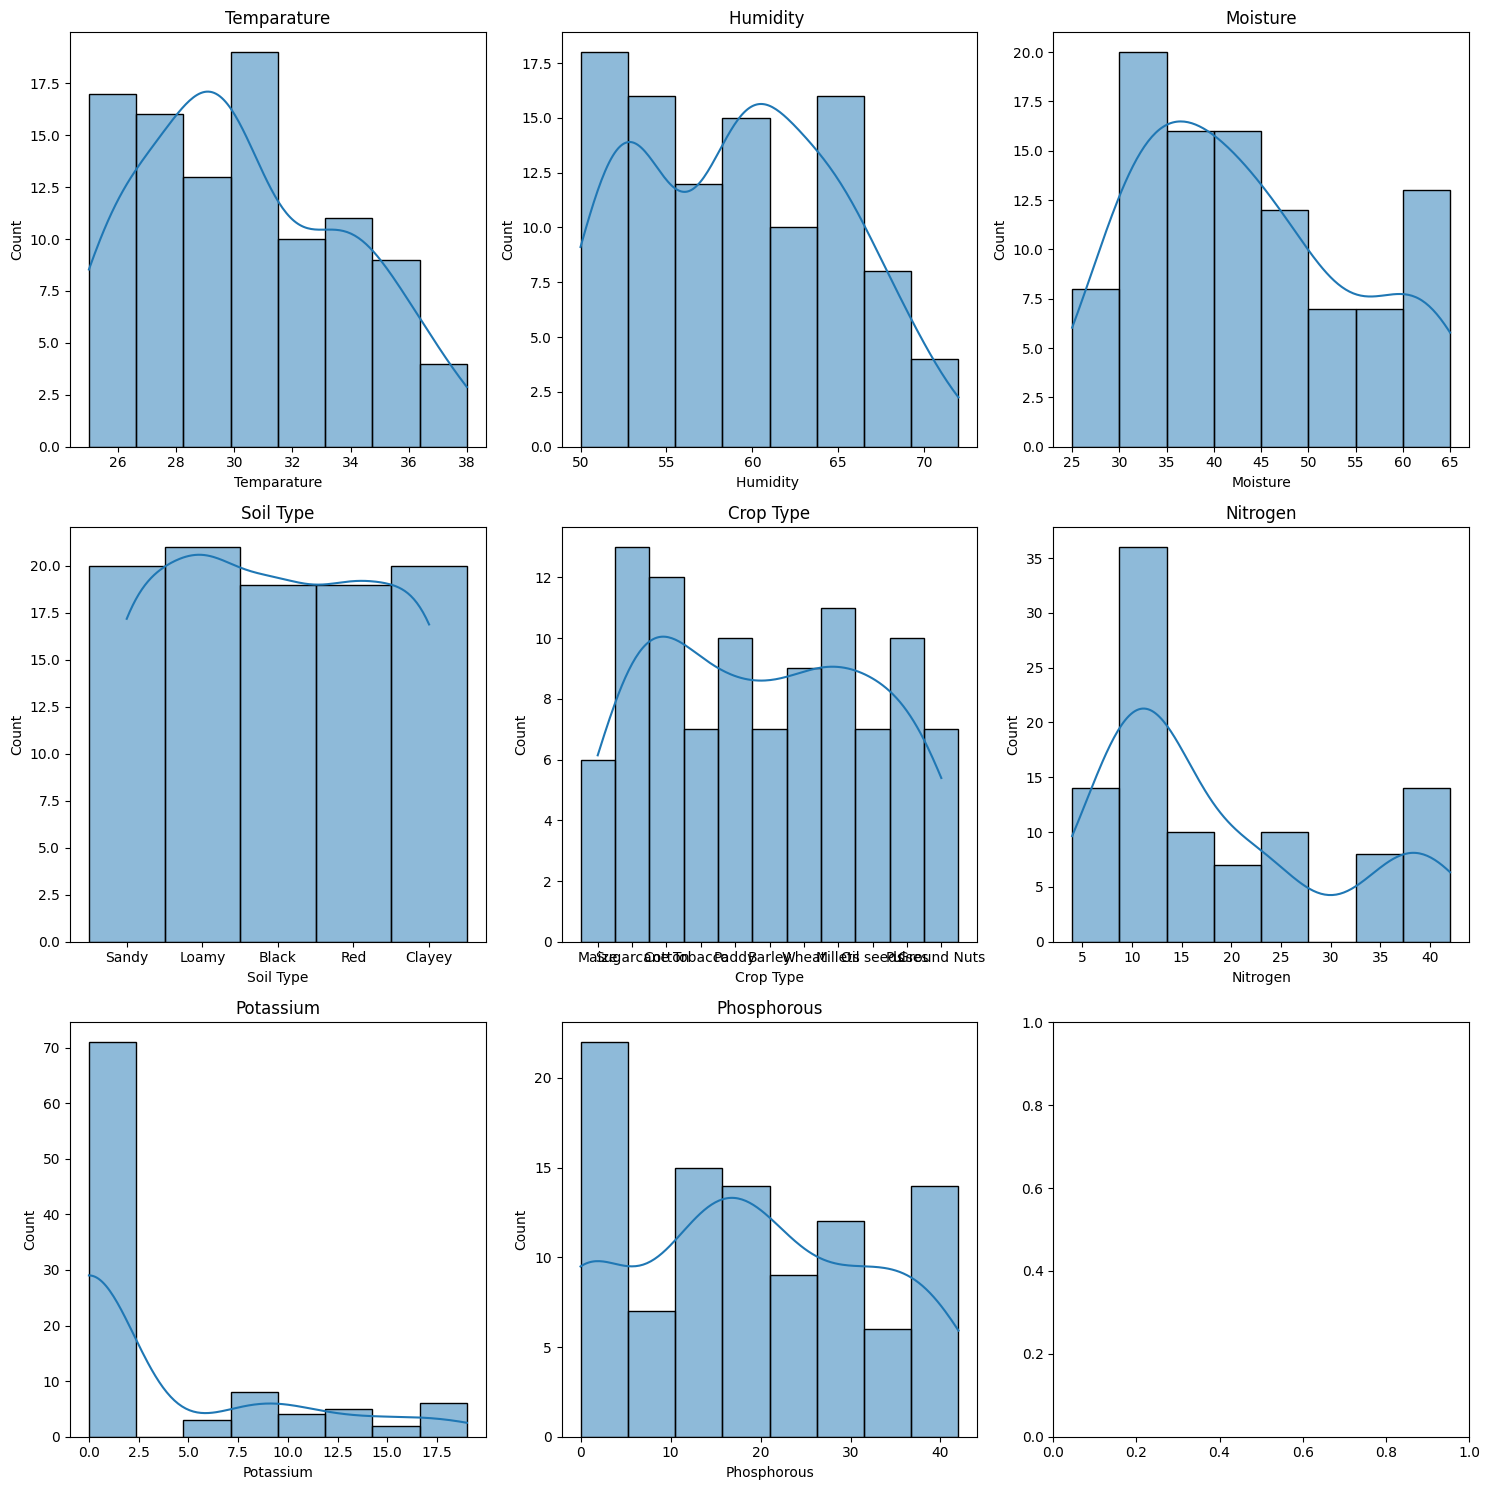

In [15]:
# visualization

import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fert[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()


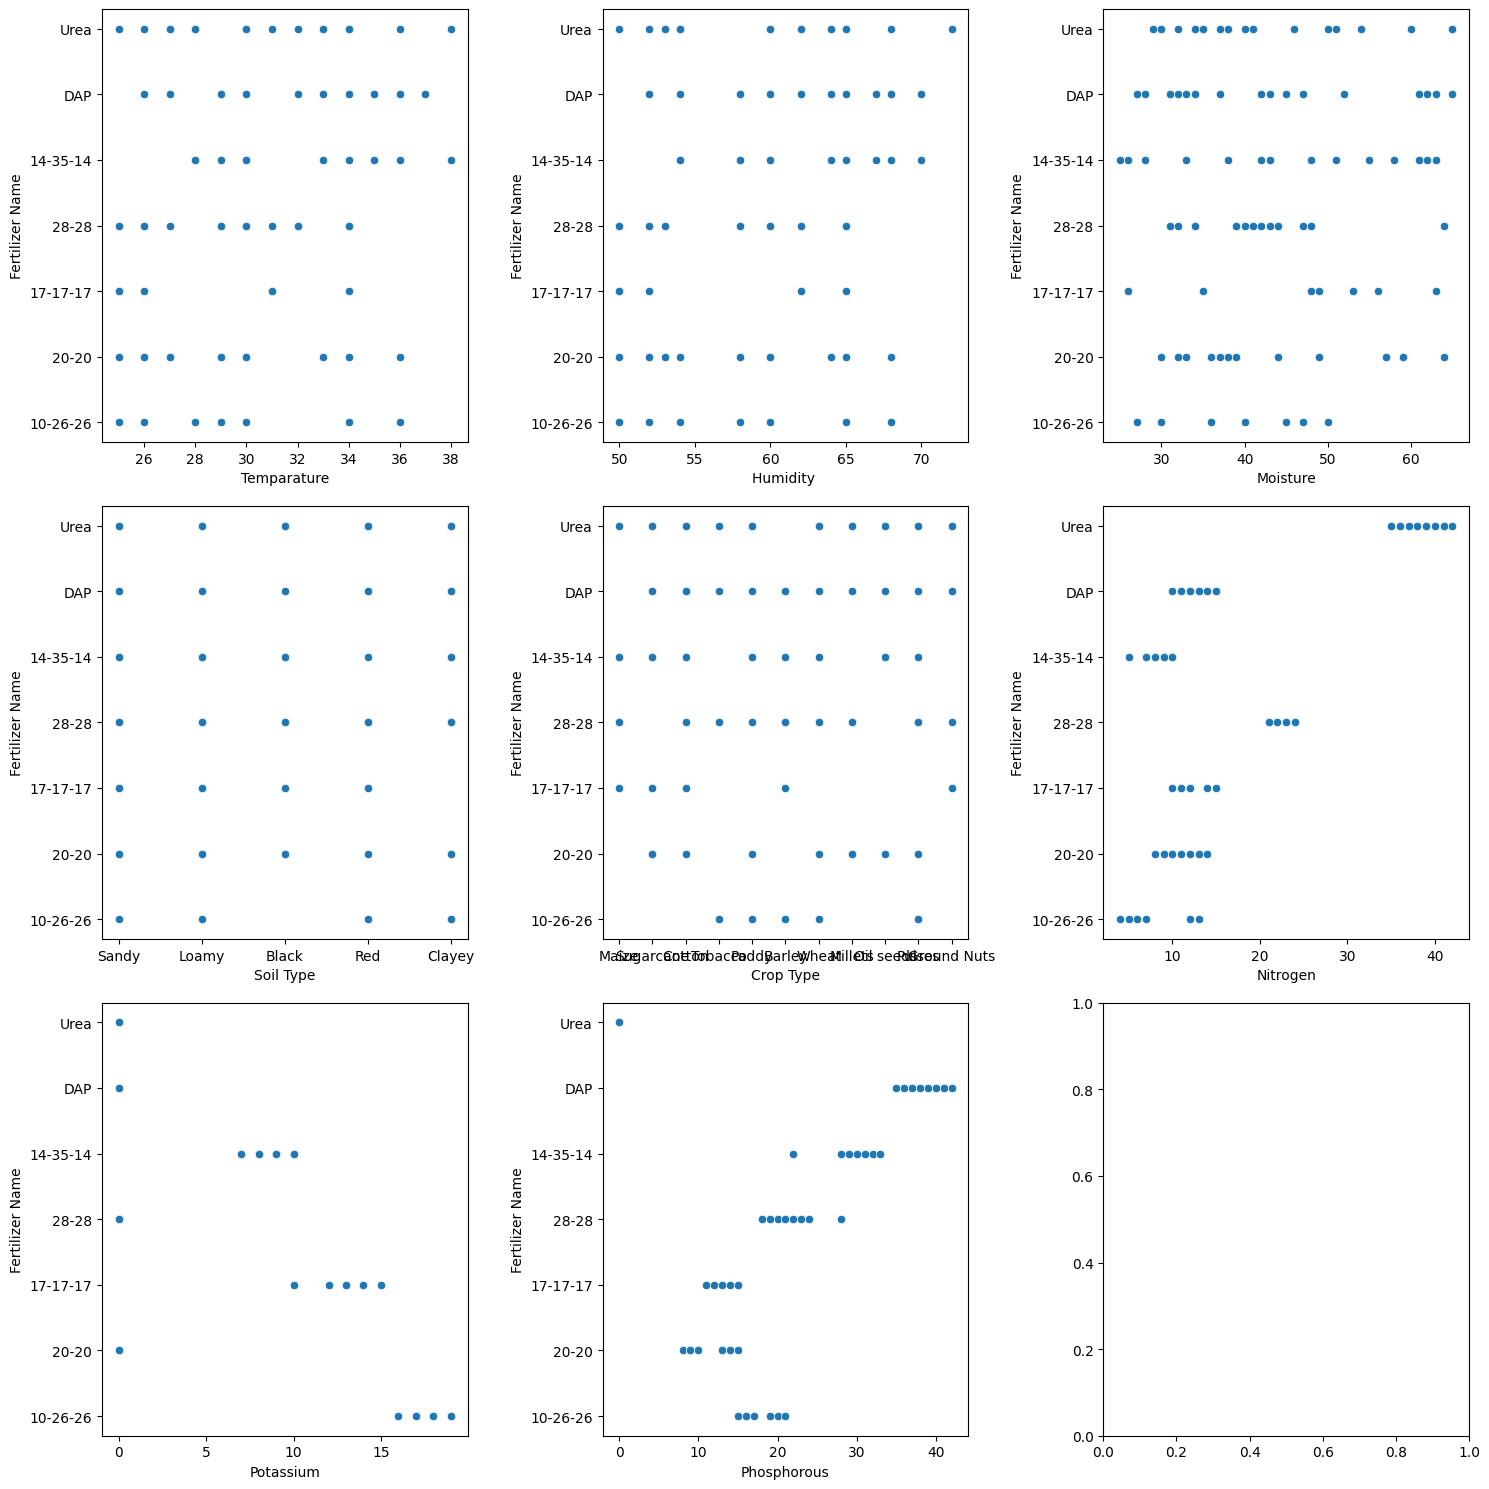

In [16]:
# Plotting a Scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i, subplots in zip(features,ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fert, ax=subplots)
plt.tight_layout()
plt.show()

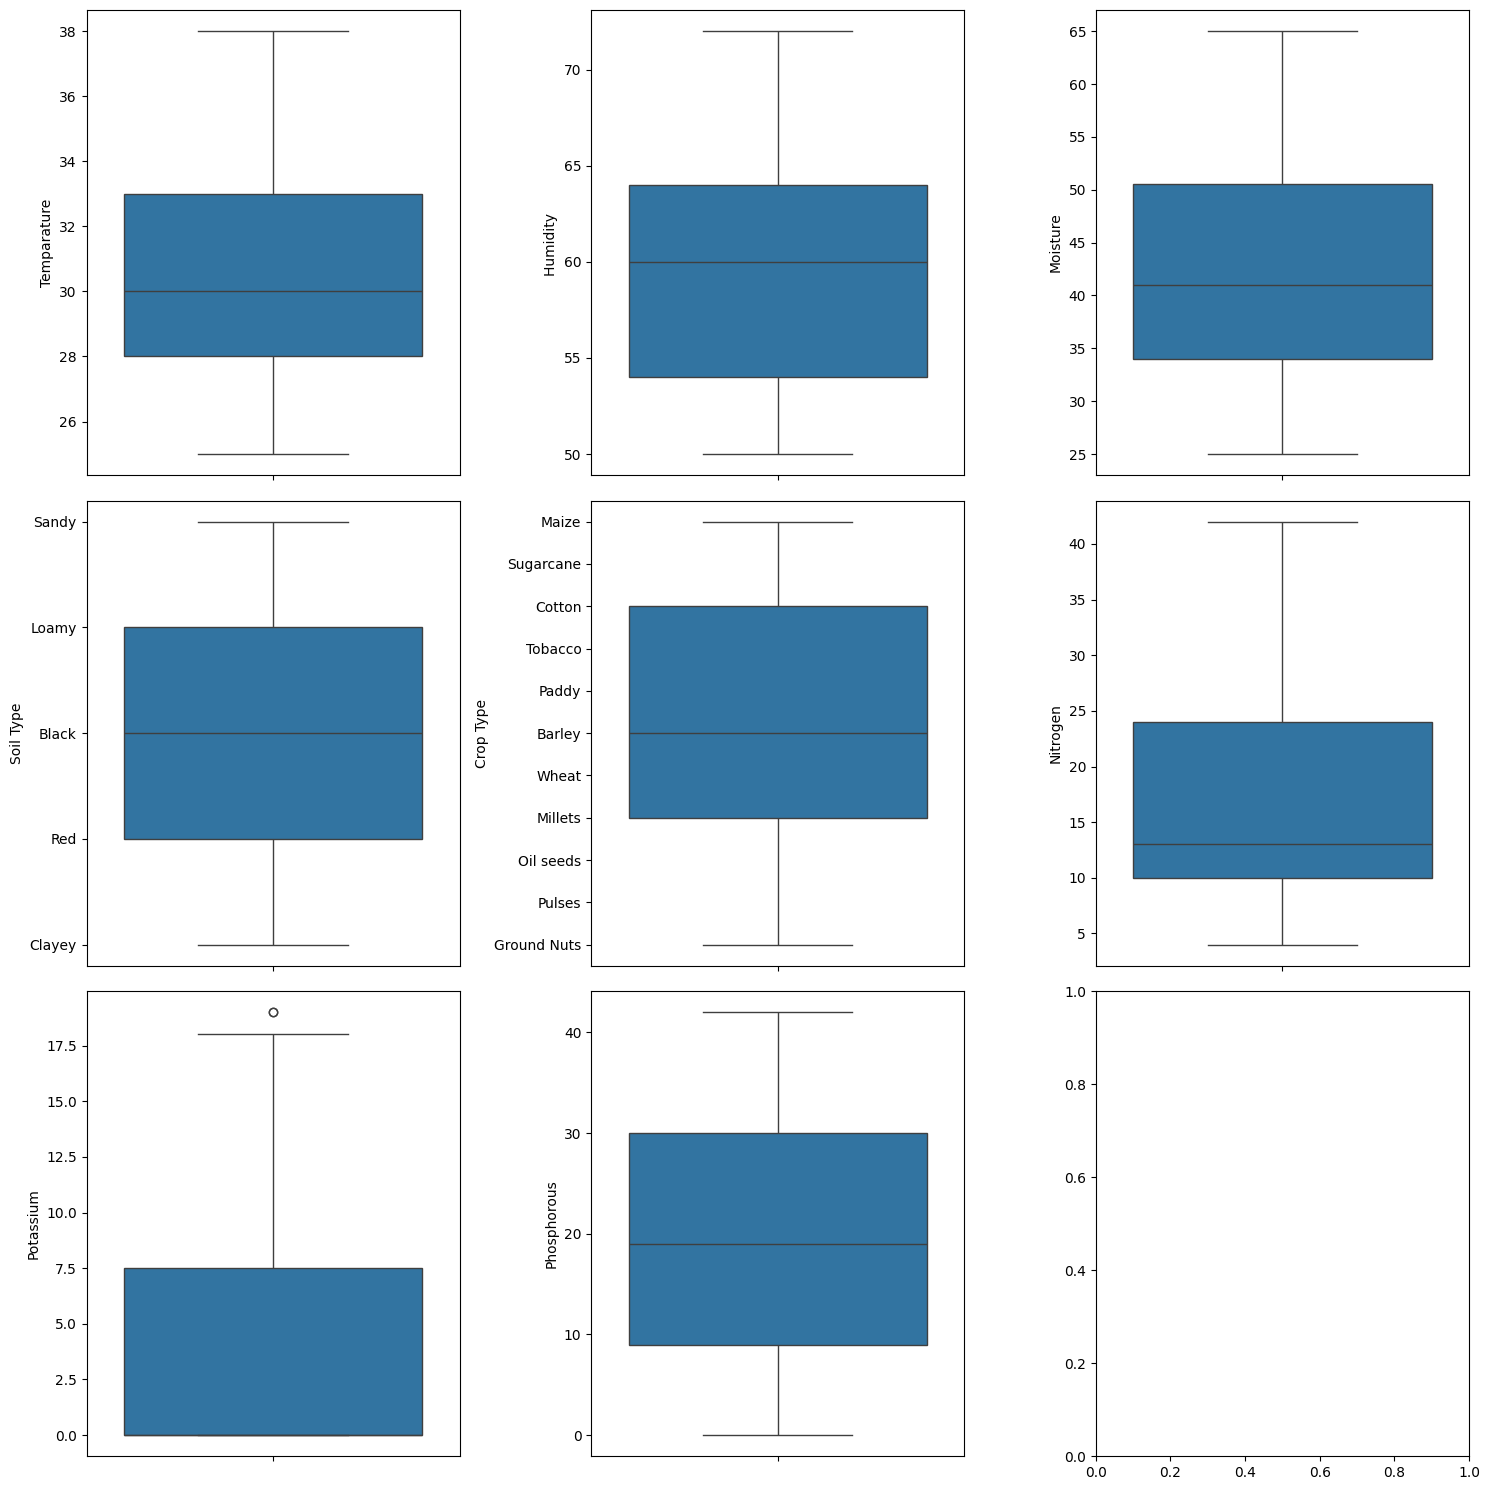

In [17]:
#finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
 
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(fert[i], ax=subplot)
 
plt.tight_layout()
plt.show()

In [18]:
# Correlation of the features
num_cols = fert.select_dtypes(include=[np.number])
num_cols

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [19]:
corr = num_cols.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


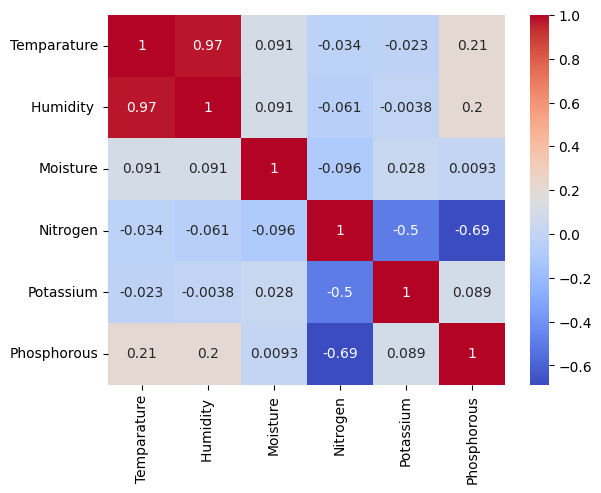

In [20]:
# visualizing with Heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [21]:
fert['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [22]:
fert_dict = {
    'Urea':0,
    'DAP' :1,
    '14-35-14' :2,
    '28-28' :3, 
    '17-17-17' :4, 
    '20-20' :5,
    '10-26-26' :6
}

In [23]:
# Map the crop labels to their numerical identifiers
fert['fert_no'] = fert['Fertilizer Name'].map(fert_dict)

# Display the first few rows of the DataFrame
print(fert.head())
fert.tail()


   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  fert_no  
0            0            Urea        0  
1           36             DAP        1  
2           30        14-35-14        2  
3           20           28-28        3  
4            0            Urea        0  


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,fert_no
94,25,50,32,Clayey,Pulses,24,0,19,28-28,3
95,30,60,27,Red,Tobacco,4,17,17,10-26-26,6
96,38,72,51,Loamy,Wheat,39,0,0,Urea,0
97,36,60,43,Sandy,Millets,15,0,41,DAP,1
98,29,58,57,Black,Sugarcane,12,0,10,20-20,5


In [24]:
fert.drop('Fertilizer Name', axis=1, inplace = True)
fert.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
94,25,50,32,Clayey,Pulses,24,0,19,3
95,30,60,27,Red,Tobacco,4,17,17,6
96,38,72,51,Loamy,Wheat,39,0,0,0
97,36,60,43,Sandy,Millets,15,0,41,1
98,29,58,57,Black,Sugarcane,12,0,10,5


error

In [25]:
# train test splitting
X = fert.drop('fert_no', axis= 1)
y = fert['fert_no']

In [26]:
X.shape

(99, 8)

In [27]:
y.shape

(99,)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
import os

# Load the data from the CSV file (update with your actual file path)
fert = pd.read_csv('Fertilizer Prediction.csv') 

# Categorical feature dictionaries
soil_dict = {
    'Sandy': 0,
    'Loamy': 1,
    'Black': 2,
    'Red': 3,
    'Clayey': 4
}
crop_dict = {
    'Rice': 0,
    'Maize': 1,
    'Sugarcane': 2,
    'Cotton': 3,
    'Tobacco': 4,
    'Paddy': 5,
    'Barley': 6,
    'Wheat': 7,
    'Millets': 8,
    'Oil seeds': 9,
    'Pulses': 10,
    'Ground Nuts': 11
}

# Map Soil_Type and Crop_Type to numerical identifiers
fert['Soil Type'] = fert['Soil Type'].map(soil_dict)
fert['Crop Type'] = fert['Crop Type'].map(crop_dict)

# Drop any remaining NaN values
fert = fert.dropna()


# One-Hot Encode categorical variables if necessary
X = pd.get_dummies(X, columns=['Soil Type', 'Crop Type'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save model, scaler, and feature names
joblib.dump(dtc, 'fertilizer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

# Verify files were saved
print(os.path.exists('fertilizer_model.pkl'))  # Should return True
print(os.path.exists('scaler.pkl'))           # Should return True
print(os.path.exists('feature_names.pkl'))    # Should return True



Accuracy: 1.00
True
True
True


In [29]:
# Import necessary libraries
import subprocess

# Function to run Streamlit app
def run_streamlit():
    command = "streamlit run fert.py"
    process = subprocess.Popen(command, shell=True)
    return process

# Run the Streamlit app
process = run_streamlit()
